**House Price**

Data insertion 

In [1]:
'''importing packages required'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
'''Load dataset'''
df = pd.read_csv("house_prices.csv")

In [3]:
df.head(5)

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [4]:
# Calculate missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Description            3023
Price (in rupees)     17665
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

Visualize Missing Data Patterns (Bar Chart)

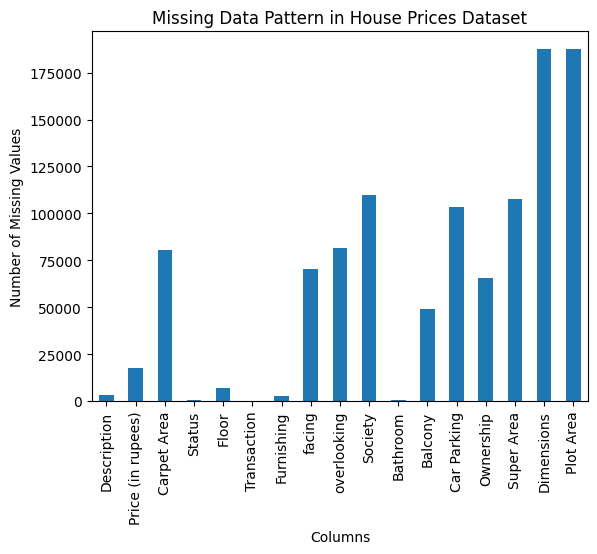

In [5]:
# Plot bar chart
plt.figure()
missing_values.plot(kind='bar')
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Data Pattern in House Prices Dataset")
plt.show()

Median Imputation

In [6]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [7]:
# Apply median imputation (robust to outliers)
df[numerical_columns] = df[numerical_columns].fillna(
    df[numerical_columns].median()
)

In [8]:
# Verify missing values
df[numerical_columns].isnull().sum()

Index                     0
Price (in rupees)         0
Dimensions           187531
Plot Area            187531
dtype: int64

Mode Imputation

In [9]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [10]:
# Apply mode imputation
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [11]:
# Verify missing values
df[categorical_columns].isnull().sum()

Title                0
Description          0
Amount(in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Society              0
Bathroom             0
Balcony              0
Car Parking          0
Ownership            0
Super Area           0
dtype: int64

Remove Columns with Extremely High Missing Values

In [12]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

In [13]:
# Set threshold (e.g., 60%)
threshold = 60

In [14]:
# Identify columns to drop
columns_to_drop = missing_percentage[missing_percentage > threshold].index

In [15]:
# Drop those columns
df = df.drop(columns=columns_to_drop)

In [16]:
# Display dropped columns
print("Dropped Columns due to high missing values:")
print(columns_to_drop)


Dropped Columns due to high missing values:
Index(['Dimensions', 'Plot Area'], dtype='object')


In [17]:
# Check dataset shape after dropping
print("\nDataset shape after dropping columns:", df.shape)


Dataset shape after dropping columns: (187531, 19)


Validate Dataset After Cleaning

In [18]:
# Check dataset shape after cleaning
print("Dataset Shape:", df.shape)

Dataset Shape: (187531, 19)


In [19]:
# Check remaining missing values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Index                0
Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Society              0
Bathroom             0
Balcony              0
Car Parking          0
Ownership            0
Super Area           0
dtype: int64


In [20]:
# Check data types
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        187531 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  187531 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        187531 non-null  object 
 7   Status             187531 non-null  object 
 8   Floor              187531 non-null  object 
 9   Transaction        187531 non-null  object 
 10  Furnishing         187531 non-null  object 
 11  facing             187531 non-null  object 
 12  overlooking        187531 non-null  object 
 13  Society            187531 non-null  object 
 14  Bathroom           187531 non-null  object 
 15  Balcony            187531 non-null  

Before vs After Comparison

In [21]:
# Dataset size before cleaning
original_df = pd.read_csv("house_prices.csv")
print("Before Cleaning:", original_df.shape)

Before Cleaning: (187531, 21)


In [22]:
# Dataset size after cleaning
print("After Cleaning:", df.shape)

After Cleaning: (187531, 19)


In [23]:
# Compare missing values
print("\nMissing Values Before Cleaning:")
print(original_df.isnull().sum())


Missing Values Before Cleaning:
Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64


In [24]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
Index                0
Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Society              0
Bathroom             0
Balcony              0
Car Parking          0
Ownership            0
Super Area           0
dtype: int64


Save cleaned dataset

In [26]:
df.to_csv("Cleaned.csv", index=False)

print("Cleaned dataset saved as Cleaned.csv")

Cleaned dataset saved as Cleaned.csv
